In [2]:
import pandas as pd


file_list = [
    
    '/Users/rainfow/Desktop/Summer projects/companies_data/datetime_1_7.csv',
    '/Users/rainfow/Desktop/Summer projects/companies_data/datetime_2_7.csv',
    '/Users/rainfow/Desktop/Summer projects/companies_data/datetime_3_7.csv',
    '/Users/rainfow/Desktop/Summer projects/companies_data/datetime_4_7.csv',
    '/Users/rainfow/Desktop/Summer projects/companies_data/datetime_5_7.csv',
    '/Users/rainfow/Desktop/Summer projects/companies_data/datetime_6_7.csv',
    '/Users/rainfow/Desktop/Summer projects/companies_data/datetime_7_7.csv'
]

# 从CSV文件读取数据，并将日期列转换为datetime类型
df_list = [pd.read_csv(f, parse_dates=["IncorporationDate"]) for f in file_list]

# 合并所有数据框为一个大的数据框
df_growth = pd.concat(df_list, ignore_index=True)
df_growth.dropna(subset=['lat', 'long'], inplace=True)

In [3]:

df_growth['Year'] = df_growth['IncorporationDate'].dt.year
df_count = df_growth.groupby(['RegAddress.PostCode', 'Year']).size().reset_index(name='CompanyCount')

In [4]:
def top_growth_areas(df_growth, df_count, top_n):
    # 对每个邮编地区的数据，找到最初一年和最后一年的公司数量
    first_year = df_count.groupby('RegAddress.PostCode')['CompanyCount'].first()
    last_year = df_count.groupby('RegAddress.PostCode')['CompanyCount'].last()
    year_span = df_count.groupby('RegAddress.PostCode')['Year'].apply(lambda x: x.max() - x.min() + 1)
    
    # 计算复合增长率
    compound_growth_rates = ((last_year / first_year) ** (1 / year_span)) - 1
    
    # 选择总增长率最高的前50个地区
    top_growth_rates = compound_growth_rates.nlargest(top_n).reset_index(name='Total_growth_rate')
    
    # 从原始数据中获取这些地区的坐标
    coordinates = df_growth.drop_duplicates('RegAddress.PostCode')[['RegAddress.PostCode', 'lat', 'long']]
    top_growth_rates = top_growth_rates.merge(coordinates, on='RegAddress.PostCode')
    
    return top_growth_rates

In [16]:
top_50_growth = top_growth_areas(df_growth, df_count, top_n=50)

print(top_50_growth)

   RegAddress.PostCode  Total_growth_rate        lat      long
0              M14 7EX           7.888194  53.442583 -2.235689
1              LS8 5DQ           7.306624  53.810659 -1.512844
2             CF14 5JY           7.185353  51.533809 -3.198456
3              B45 0HD           5.782330  52.400893 -2.020621
4              BR6 8HD           3.876999  51.368932  0.061192
5             WC2B 5AN           3.641589  51.515892 -0.121730
6             DN32 0NG           3.431048  53.558610 -0.079214
7             BT14 8BZ           3.222953  54.624816 -5.977408
8              SN5 7BL           3.101566  51.558937 -1.825253
9              ST3 1JU           3.082483  52.991684 -2.130848
10             OL6 8PB           2.872983  53.494634 -2.092933
11             DN4 0AX           2.741657  53.518039 -1.143443
12             IP1 2HB           2.741657  52.060285  1.143794
13            NP11 6EF           2.672974  51.604199 -3.090408
14             B33 0YP           2.608826  52.477429 -1

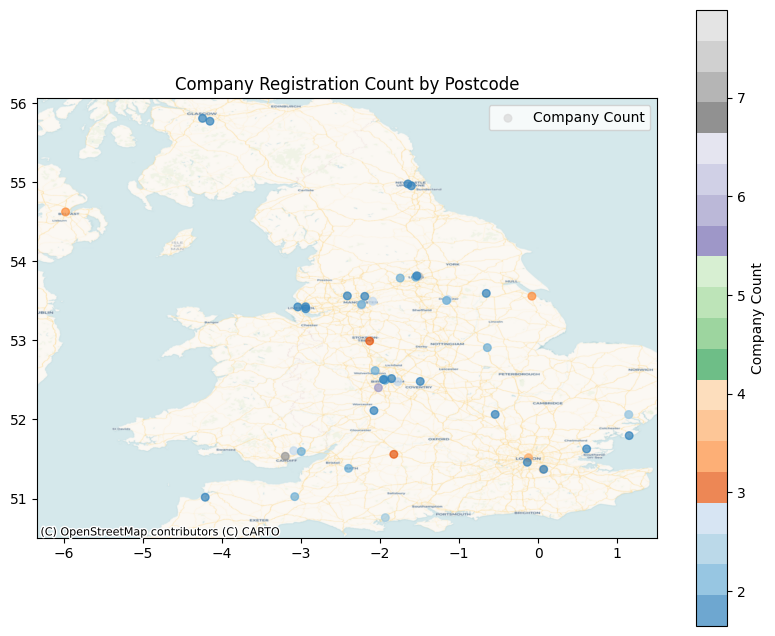

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import contextily as ctx


# 创建地图
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_title('Company Registration Count by Postcode')

# 绘制散点图，并根据公司数量设置颜色
sc = ax.scatter(top_50_growth['long'], top_50_growth['lat'], s=30, c=top_50_growth['Total_growth_rate'], cmap='tab20c', alpha=0.7, label='Company Count')

# 添加颜色图例
cbar = plt.colorbar(sc)
cbar.set_label('Company Count')

# 添加地图底图
ctx.add_basemap(ax, crs='EPSG:4326', source=ctx.providers.CartoDB.Voyager)

# 添加图例
ax.legend()

# 显示地图
plt.show()



In [25]:
num_unique_categories = num_unique_categories = df_growth['SICCode.SicText_1'].nunique()

print(num_unique_categories)

1169


In [26]:
import pandas as pd


# 筛选出特定地区的数据
df_specific = df_growth[df_growth['RegAddress.PostCode'] == 'CF14 8LH']

# 然后，我们按年份对特定地区的公司进行分组和计数
df_count = df_specific.groupby(['Year']).size().reset_index(name='CompanyCount')

# 计算3年的滚动平均
df_count['RollingMean'] = df_count['CompanyCount'].rolling(window=3).mean()

# 打印结果
print(df_count)


    Year  CompanyCount  RollingMean
0   1913             1          NaN
1   1927             1          NaN
2   1929             1     1.000000
3   1931             1     1.000000
4   1951             1     1.000000
5   1957             1     1.000000
6   1965             2     1.333333
7   1968             1     1.333333
8   1973             1     1.333333
9   1976             1     1.000000
10  1977             1     1.000000
11  1978             1     1.000000
12  1979             1     1.000000
13  1980             2     1.333333
14  1981             2     1.666667
15  1983             1     1.666667
16  1985             1     1.333333
17  1986             1     1.000000
18  1989             1     1.000000
19  1990             2     1.333333
20  1991             3     2.000000
21  1992             6     3.666667
22  1993             3     4.000000
23  1994             3     4.000000
24  1995             4     3.333333
25  1996             3     3.333333
26  1997             5     4